# 🚗 **Welcome to the <font color='crimson'>** **Explorer Transportation Data Science Project! 🚗**</font>
 Hosted by the [Northeast Big Data Innovation Hub](https://nebigdatahub.org/about) & [National Student Data Corps](https://nebigdatahub.org/nsdc), in collaboration with the [U.S. Department of Transportation Federal Highway Administration](https://highways.dot.gov/).


---



## <font color='crimson'>**Project Information and Background:**</font>

**Project Description:**

By participating in this project, you are joining a
community of transportation data science learners interested in making roads safer for vulnerable road users.

The Explorer TDSP has six Milestones, including guided transportation research into a community of interest. Each Milestone can take 1-5 hours, or less, depending on your level of experience.

To learn more about this project, including key highlights, incentives, and important links, [review the TDSP Webpage here](https://nebigdatahub.org/nsdc/tdsp/)!

## <font color='crimson'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic exploratory data analysis.
  

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**Step 1:** Let’s access our data. We will be using the [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). According to NYC Open Data, "each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC." If you need a reminder on how to upload your dataset, [please review helpful hints here.](https://nebigdatahub.org/wp-content/uploads/2023/04/NSDC-Data-Science-Projects-Introduction-Using-Google-Colab.pdf)

Since this is a large dataset, we highly recommend that you upload your data by [mounting your Google Drive](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA).

To mount your Google Drive, begin by finding the folder icon on the left side of your screen. When you click on this folder icon, you will open the Files window. Click on the icon at the top of the Files window that says "Mount Drive" as you hover over it.



In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# TODO: Read the data using pandas read_csv function
data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250104.csv")

/tmp/ipython-input-1629179143.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20250104.csv")


**Step 2:** Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataset.

In [29]:
# TODO: Print the first 5 rows of the data
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [30]:
# TODO: Describe the data
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.907120e+06,1.907120e+06,2.146646e+06,2.146633e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06,2.146664e+06
mean,4.062064e+01,-7.373927e+01,3.194681e-01,1.541950e-03,5.810644e-02,7.621127e-04,2.795640e-02,1.206523e-04,2.291896e-01,6.344728e-04,3.212324e+06
std,2.050499e+00,3.841687e+00,7.079647e-01,4.144304e-02,2.471785e-01,2.816397e-02,1.669818e-01,1.102586e-02,6.691165e-01,2.754842e-02,1.507056e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066756e+01,-7.397469e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.172786e+06
50%,4.072055e+01,-7.392705e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.709598e+06
75%,4.076962e+01,-7.386674e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.246494e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.783389e+06


The information above is currently formatted in scientific notation. Need a refresher? [Review how to analyze and convert to and from scientific notation here!](https://www.mathsisfun.com/numbers/scientific-notation.html)

1. Latitude & Longitude: The latitude and longitude indicate where the crashes are occurring. However, there are some data points with latitude and longitude values of 0, which is likely due to missing or inaccurate data.

2. Number of Persons Injured: On average, each crash has around 0.305 injuries. The maximum number of injuries in a single crash is 43.

3. Number of Persons Killed: Fatalities are rare, with an average of 0.00146 deaths per crash. The maximum number of deaths in one crash is 8.

4. Number of Pedestrians, Cyclists, and Motorists Injured/Killed: These columns provide a breakdown of the injuries and fatalities by type of individual involved.

5. Collision ID: This is a unique identifier for each crash.



---



##<font color='crimson'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>
GOAL: The main goal of this milestone is to assess the dataset, find missing values, and decide what to do with those missing data points.

**Step 1:**
Before we begin assessing our data for missing values, it is important that we understand the ethical implications surrounding data processing. To best prepare yourself for this module, review one or more of the following resources:
- [Data Science Ethics Flashcard Video Series](https://youtube.com/playlist?list=PLNs9ZO9jGtUB7XTjXy-ttoo2QSLld9SrV&feature=shared)
- [What Do I Need to Understand about Data Ethics?](https://www.youtube.com/watch?v=Efy8htCDueE)
-[Introduction to Data Cleaning](https://www.youtube.com/watch?v=t8WkoGLkdTk)

**TO DO:** Based on the resources above and outside knowledge, what are some potential bias issues related to the availability of data from well-resourced communities as compared to under-resourced communities? How might bias show up in our dataset?

> Answer here: The potential bias issues include sampling bias issue and quality of data issue. Sampling of well-resourced communities is more representative, while sampling of under-resourced communities is underepresented. Because of advanced technology, data from well-resourced communities may be more reliable, while data from under-resourced communites may contain errors or gaps. These bias will lead to overepresentation, underepresentation, missing data, and etc in our dataset.



**Step 2:**
Check the dataset for missing values.


In [31]:
#TODO: Find the number of missing values in each column
missing_values = data.isnull().sum()

#TODO: Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(data)) * 100

#TODO: Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2137355,99.566350
CONTRIBUTING FACTOR VEHICLE 5,2137059,99.552562
VEHICLE TYPE CODE 4,2112763,98.420759
CONTRIBUTING FACTOR VEHICLE 4,2111505,98.362156
VEHICLE TYPE CODE 3,1997909,93.070411
CONTRIBUTING FACTOR VEHICLE 3,1992088,92.799246
OFF STREET NAME,1778132,82.832339
CROSS STREET NAME,818433,38.125808
ZIP CODE,665824,31.016684
BOROUGH,665561,31.004433


Here's an overview of the missing values in the dataset:

Columns like VEHICLE TYPE CODE 5, CONTRIBUTING FACTOR VEHICLE 5, VEHICLE TYPE CODE 4, and so on have a high percentage of missing values. This is expected since not all crashes involve multiple vehicles or factors.

OFF STREET NAME and CROSS STREET NAME have significant missing values. This could be due to crashes occurring in locations where these details aren't applicable or weren't recorded.

ZIP CODE, BOROUGH, and ON STREET NAME also have missing values. This might be due to incomplete data entry or crashes occurring in areas where these specifics aren't easily determinable.

LOCATION, LATITUDE, and LONGITUDE have the same count of missing values, indicating that when one is missing, the others are likely missing as well.

**Step 3:** Create a bar chart to display the top 10 contributing factors (e.g. backing up unsafely, unsafe lane changing, etc.) to crashes within the dataset.

/tmp/ipython-input-1006362614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_factors.index, y=top_factors.values, palette="magma")
/tmp/ipython-input-1006362614.py:14: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


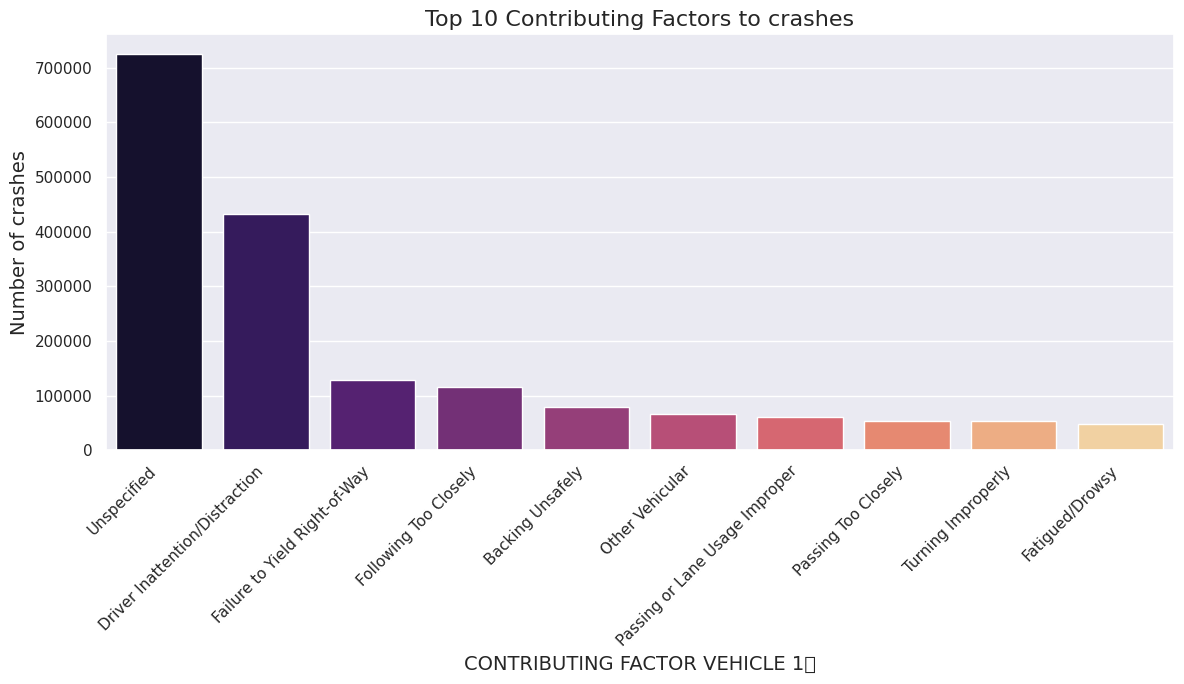

In [32]:
#TODO: Plot a Bar Chart

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))
# TODO: Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'

sns.barplot(x= top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('CONTRIBUTING FACTOR VEHICLE 1	', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**TO DO:** Besides for "Unspecified," what are the top 3 contributing factors that cause the most crashes?

> *  Driver Inattention/Distraction
> *  Failure to Yield Right-of-Way
> *  Following Too Closely

**TO DO:** What recommendations would you make to new and current drivers after assessing the above data?

> *   When a driver cannot concentrate on driving, he should stop driving and pull over to rest. This is not only responsible for his own life but also for the lives of others. When a driver is preparing to turn right, he or she should pay attention to bicycles, motorcycles, pedestrians, etc. because ignoring blind spots may lead to traffic accidents. Drivers should keep an appropriate distance from the vehicle in front to avoid rear-end collisions.




**Step 4:** Now, let's create another bar chart to determine which vehicle types were involved in the most crashes.

/tmp/ipython-input-2925649924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


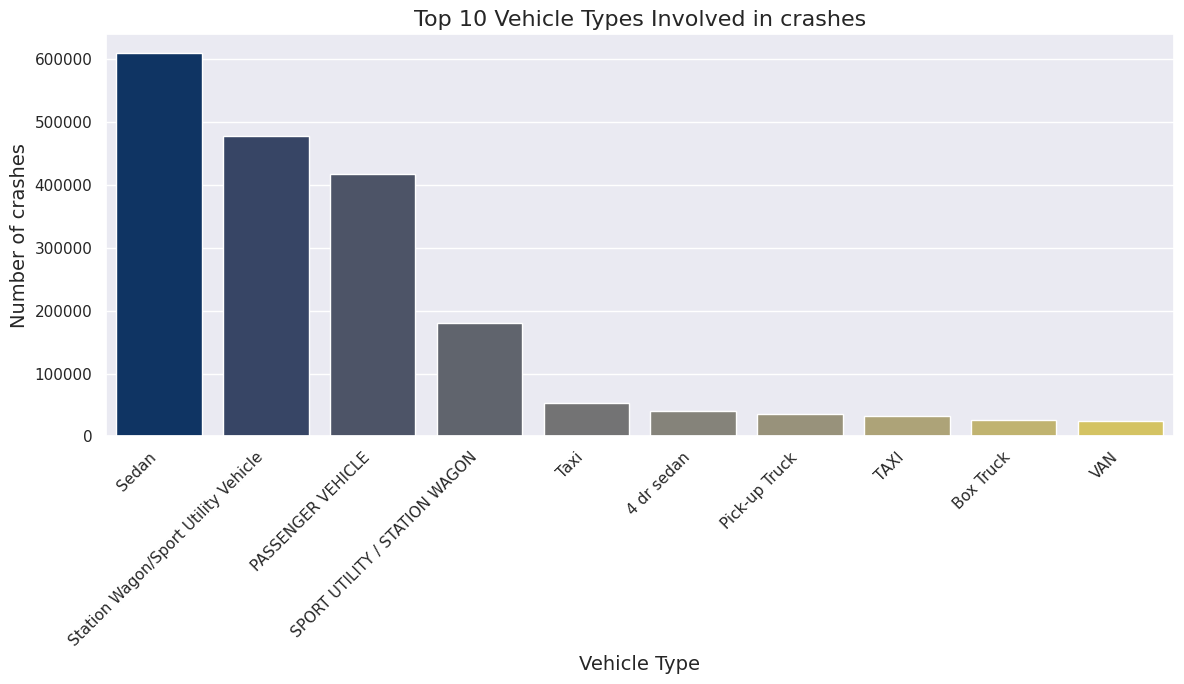

In [33]:
#TODO: Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

#TODO: Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**TO DO:** What are the top 3 vehicles that were most involved in crashes?


> *   Sedan
> *   Station Wagon/Sport Utility Vehicle
> *   PASSENGER VEHICLE







**TO DO:** Why do you think that "Sedan[s]," "Station Wagon[s]," and "Passenger Vehicle[s]" are involved in a larger number of crashes, injuries, and deaths when compared to the rest of the vehicles? (Think outside the box!)


> *  These types of vehicles account for a large proportion of traffic accidents because they are the most common types of cars on the road. In addition, drivers of these types of vehicles often frequently travel through urban streets and alleys, and many drivers occupy roads and park for some reason, which is also the cause of traffic accidents. Compared with a bus driver's license or a truck driver's license, a C class driver's license is easier to obtain. The driver's understanding of traffic rules and familiarity with traffic rules are also one of the reasons for accidents.






**TO DO:** Review the x-axis of the bar chart you created above. </br>
1) What do you notice? </br>
2) What would you recommend we do to improve the bar chart, based on the x-axis (horizontal axis) and why? </br>
3) What recommendation would you make to those who are collecting and/or inputting data into this dataset?


> *  1) Some models that originally belonged to the same category were classified into different categories because of different spellings or capitalization or order.
> *  2) We should combine models that originally belong to the same category because this can avoid inaccuracies or errors in data analysis due to classification errors. For example, "Station Wagon/Sport Utility Vehicle" and "SPORT UTILITY / STATION WAGON" originally belonged to the same category, but were classified into different categories because of the different spelling order. If they were combined, their proportion of total traffic accidents might exceed that of sedan, which ranks first.
> *  3) I think data entry workers should unify the data format when entering data, such as unifying lowercase or uppercase, unifying the spelling order, and unifying the spelling method, so as to avoid misclassification.






**Step 5:**  A DataFrame is a two-dimensional and potentially heterogeneous tabular data structure with labeled axes (rows and columns). DataFrames allow for storing, manipulating, and retrieving data in a structured form, serving as the primary data structure for a multitude of data processing tasks. It is used with Python libraries like pandas.

Let's graph the *types* of crashes within this dataset and their frequencies. Begin by aggregating your data, convert to [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) for simple plotting, and plot.



/tmp/ipython-input-2486357126.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")


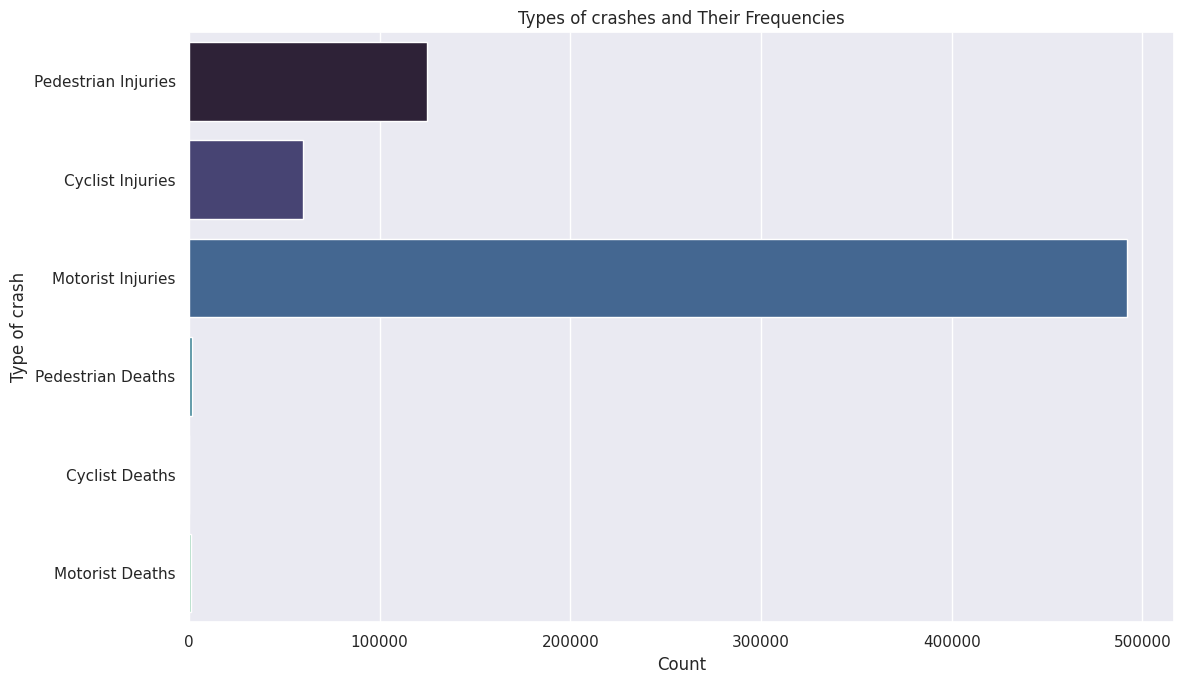

In [34]:
#TODO: Converting to DataFrame for easy plotting

types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


**TO DO:** Analyze the chart above. What is a recommendation you might make to the Department of Transportation based on this data?


> *  From the data, although there are relatively few death cases of pedestrians, motorcyclists and cyclists in traffic accidents, there are many cases of injuries. Most of the injuries to pedestrians, motorcyclists and cyclists due to traffic accidents are caused by the driver turning right because of a blind spot in the field of vision, or occupying the bicycle lane and turning right without paying attention to pedestrians, bicycles or motorcycles. My suggestion is to strengthen the education of drivers on traffic rules and promote polite yielding and civilized driving. For example, through TV channels and other media, we should publicize the data on injuries to pedestrians, motorcyclists, and cyclists due to traffic accidents every year, so that drivers can Become aware. Secondly, on busy urban thoroughfares, dedicated bicycle lanes should be established, and appropriate penalties should be imposed on those who park or occupy the lanes. In addition, measures such as setting up right-turn lanes on urban arteries and turning right only when the right-turn signal is on can reduce the occurrence of injuries to pedestrians, cyclists and motorcyclists due to traffic accidents.





---

##<font color='crimson'> **Milestone #3 - Time Series Analysis**</font>
GOAL: The main goal of this milestone is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

**TO DO:** Write 3-5 sentences about TSA.
> *  Time series analysis is a statistical analysis method used to analyze the distribution of data collected at consecutive points in time. Typically these time points are evenly spaced. It has four important components, including level, trend, seasonality and noise. A time series can be broken down into these four conponents, or they can be combined into series using additive or multiplicative model.







**Step 1:** Let's begin by creating a chart that displays the average number of crashes per hour of the day. This will help us understand whether additional factors are contributing to crashes - i.e. rush hour, school dismissal time, night fall, etc.

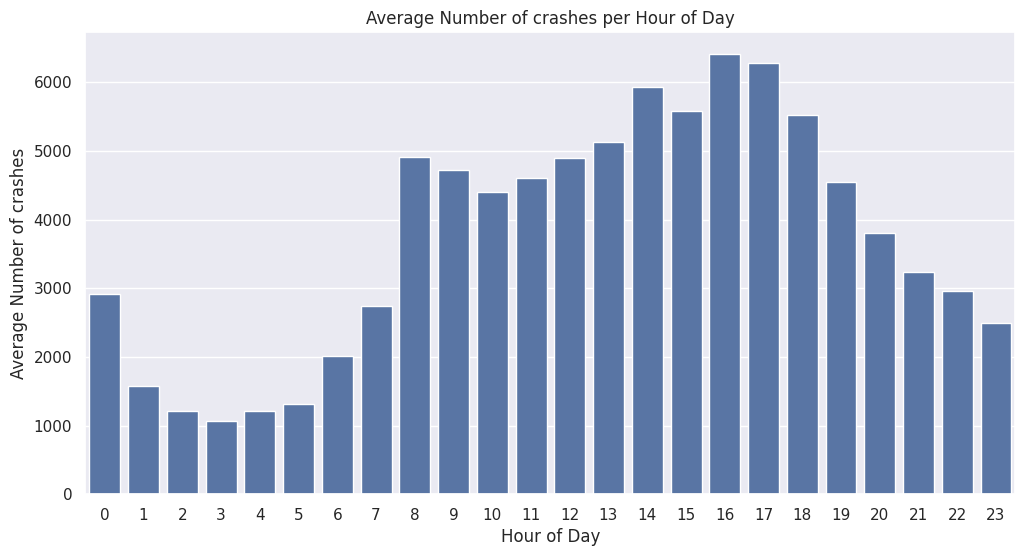

In [35]:


# TODO: Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# TODO: Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# TODO: Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

# TODO: Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y= average_crashes_per_hour.values)
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()




**TO DO:** Which time of the day sees the most crashes? Why do you think so?

> *  From the barchart, we can see that the time when most accidents occur is at 16 or 4pm. I think traffic accidents are most frequent at this time, because it is rush hour and the traffic is congested.



 **Step 2:**
Plot a graph to determine how COVID-19 impacted the number of crashes per month, if at all.


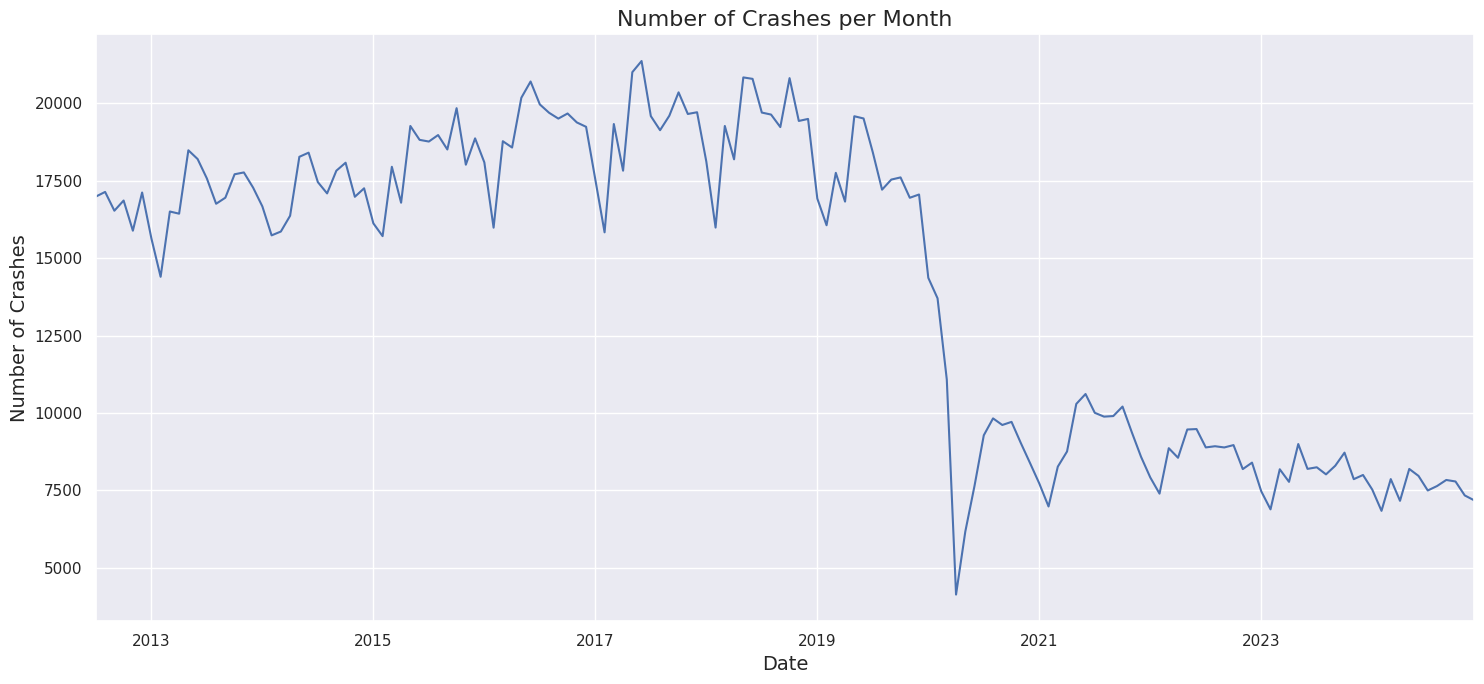

In [36]:
# TODO: Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# TODO: Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# TODO: Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

**TO DO:** What does your graph tell you about the impact of COVID-19 on the number of crashes per month? Why do you think this occurred?

> *  At the beginning of 2020, due to the spread of the epidemic, the government issued a stay-at-home order, and the number of vehicles on the road dropped rapidly, which indirectly led to a reduction in the number of accidents. During this time, many companies advocate working from home. As the epidemic is slowly brought under control and people slowly return to work, the number of vehicles on the road has also increased, and traffic accidents have also increased. Since many people seem to have become accustomed to working from home, and many companies are encouraging employees to work remotely or hybridly, this has also resulted in fewer vehicles on the road than before the epidemic, leading to fewer accidents.



**Step 3**: Apply time series decomposition to review trends, seasonality, and residuals. New to time series analysis? Review the [Time Series Flashcard video series](https://youtube.com/playlist?list=PLNs9ZO9jGtUAqd0CNKySksPJJaOqYPMvk&feature=shared) here to learn about trends, components, and further analysis!

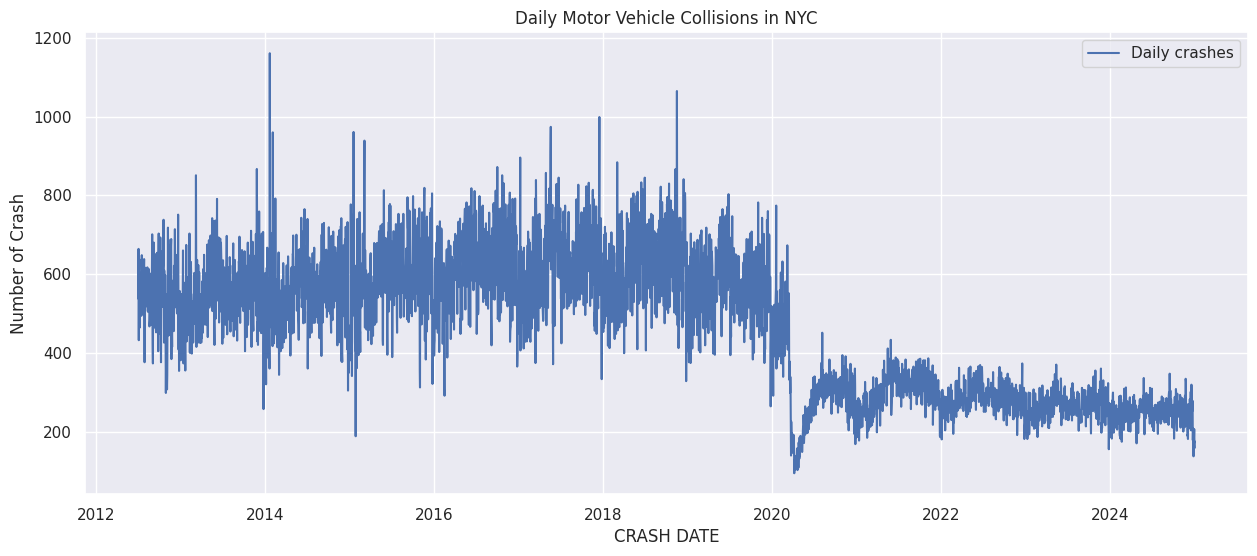

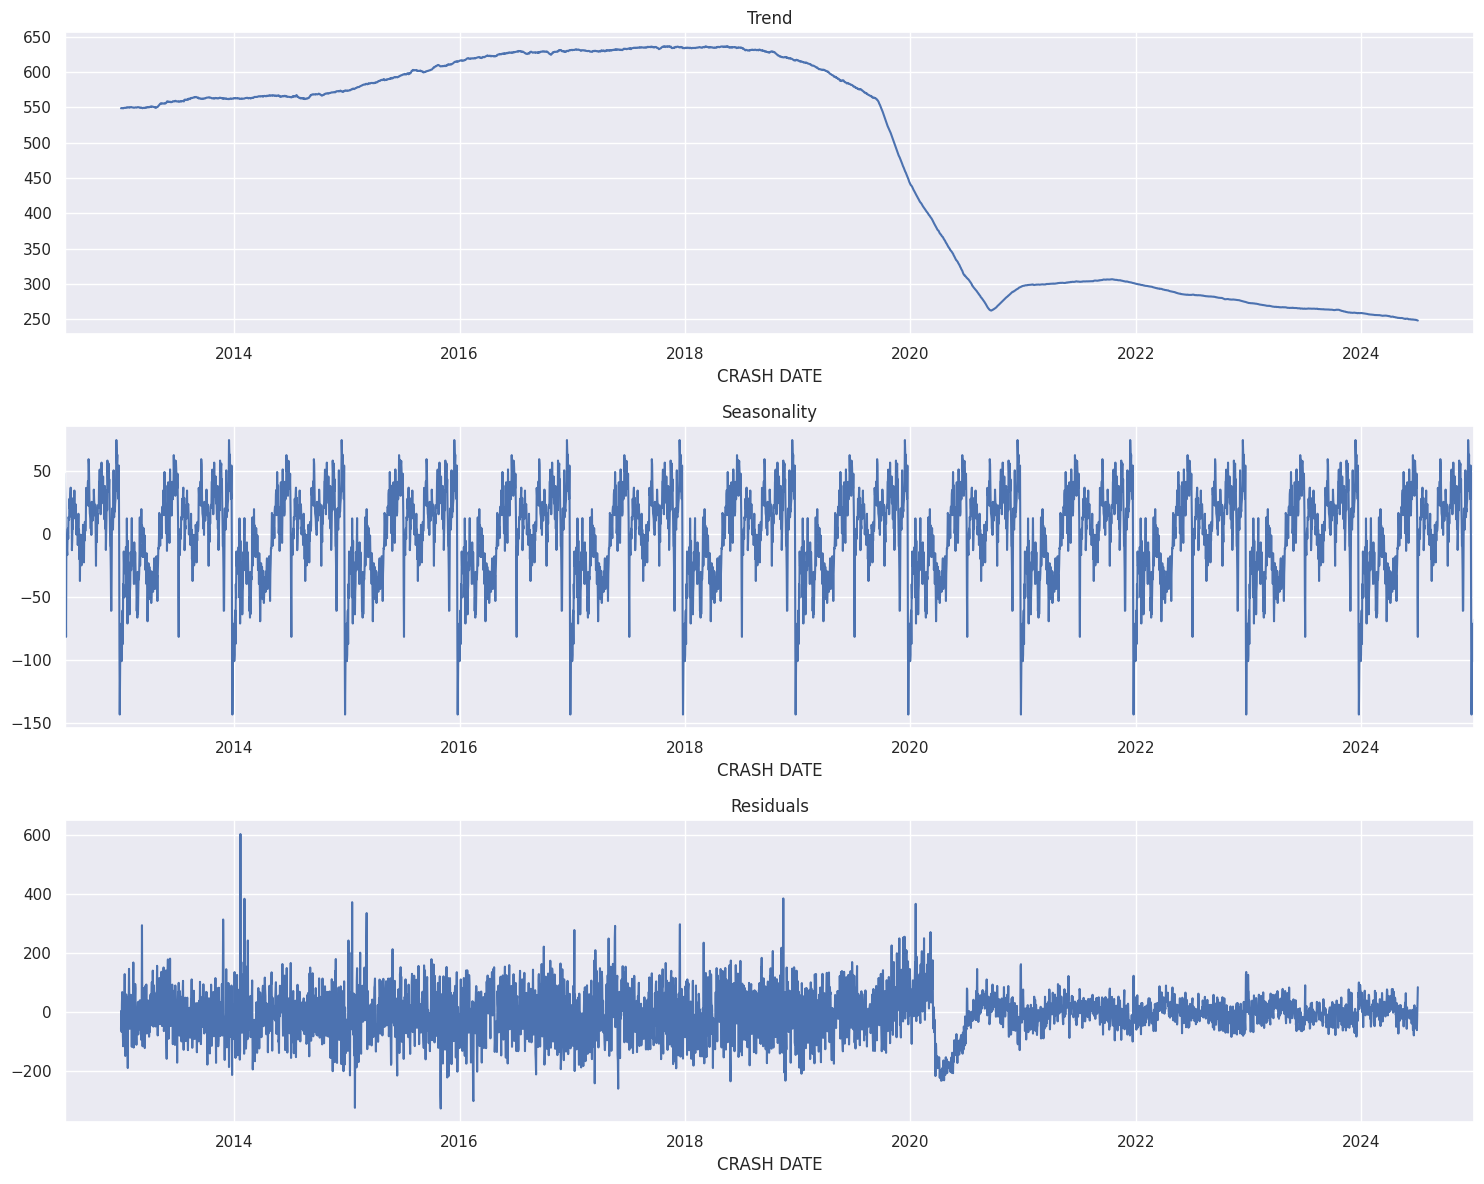

In [37]:

# TODO: Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby(data['CRASH DATE']).size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('CRASH DATE')
plt.ylabel('Number of Crash')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

The visualizations above provide valuable insights into the time series of daily motor vehicle collisions in New York City:

1. Time Series Plot: This shows the number of daily crashes over time. You might observe long-term trends, seasonal patterns, or significant outliers.

2. Decomposed Components:
  
    2.1 Trend: This graph shows the long-term trend in the data, which can indicate whether crashes are increasing, decreasing, or stable over time.

    2.2 Seasonality: This reveals any regular patterns that repeat over a specific period, such as yearly. It helps identify times of the year with higher or lower crash frequencies.

    2.3 Residuals: These are the irregular components that cannot be attributed to the trend or seasonality. They might include random or unpredictable fluctuations.

**TO DO:** Based on your *trend graph*, are we seeing an increase or a decrease in crashes between 2014 and 2022?

> *  I see a decreasing in crashes between 2014 and 2022.


**TO DO:** Based on your *residual graph*, in what year(s) was there a significant unpredicted fluctuation? Why do you think so?

> *  Judging from the residual plot, there have been significant unpredictable fluctuations in 2020. Normal residual plots generally fluctuate around 0. The reason for this is that the epidemic occurred in 2020, people stayed at home, there were fewer vehicles on the road, and there were fewer traffic accidents.

---

##<font color='crimson'>**Milestone #4 - Geospatial Analysis**</font>
GOAL: The main goal of this milestone is to explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations.

**Step 1:** Before beginning this Milestone, we highly recommend that you review the [NSDC Geospatial Analysis Flashcard Video series](https://www.youtube.com/playlist?list=PLNs9ZO9jGtUAX_2g1-OJp8VkmVum6DqqP) if you are new to Geospatial Analysis!

Let's build a bar chart to compare and analyze the number of crashes across the five boroughs: Brooklyn (also known as Kings County), Queens, Manhattan, Bronx, and Staten Island.

/tmp/ipython-input-2258888865.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= borough_count.index, y= borough_count.values, palette="viridis")


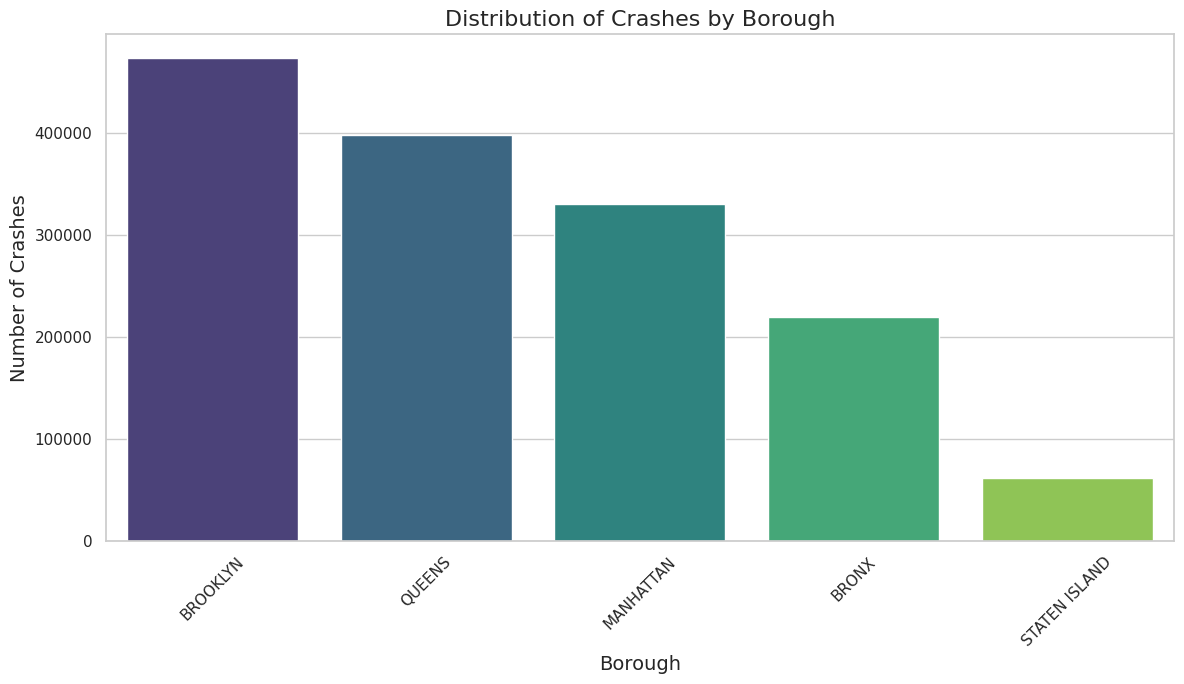

In [38]:
#TODO: Plot a bar chart to compare the number of crashes that occurred in each of the five boroughs.
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x= borough_count.index, y= borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TO DO:** Which borough has the highest number of crashes? Which borough has the lowest?

> * Highest: BROOKLYN
> * Lowest:  STATEN ISLAND


**TO DO:** Are there any reasons that you think a certain borough has a higher or lower number of crashes? What are some factors that may be causing this?

> *  I believe population density, road conditions, and traffic volume are the primary causes of traffic accidents in these five communities. Five neighborhoods are listed in descending order of population density: Brooklyn, Queens, Manhattan, the Bronx, and Staten Island. Brooklyn is a very old community with many narrow roads, and is the most populous of the five communities. There are many pedestrians and bicycles. These are some of the reasons why so many traffic accidents occur. STATEN ISLAND is the least populated and densely populated community with less traffic and wide roads, resulting in a lower rate of traffic accidents. Population, population density, traffic volumne, road condition, pedestrians, bicycles, speed, and etc are all the factors causing crash accidents.

**Step 2:** Heatmaps are graphical representations that use color coding to represent different values and variables. Let's leverage a heatmap to determine the most dangerous intersections in the dataset. (**Note: the below cell may take a few minutes to run**)

In [ ]:
#TODO: Create a heatmap leveraging the latitude and longitude variables to determine where the most crashes are occurring
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")


**TO DO:** On the left side of your screen, you will see an icon that represents a folder or a file. Click on that icon to find the file titled "Heatmap.html". Click on the three dots next to your file and download your heatmap! Open the file once downloaded to see your creation.

When looking at your heatmap, where do you see a concentration of crashes?


> *  From the heatmap, we see that crashes are concentrated in Manhattan neighborhoods.



**Step 3:** Next, we will begin "Severity Mapping." We'll plot crashes on the map and code them based on severity, distinguishing between crashes that resulted in injuries and those that led to fatalities. This will give us a visual representation of where severe crashes tend to occur. </br>

You may initially want to code these incidents by using different colors, but it's important to think about your map and how accessible it is. Will a color-coded map be easy to read for everyone? Let's make a map that's inclusive for people with color blindness by also creating differently-shaped markers (squares, circles, and triangles) for crashes, injuries, and fatalities.

In [ ]:
#TODO: Continue building your heatmap
# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "green"  # Injuries
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "orange"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4,
          radius=5,
          gradient = False,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)


m_severity.save("severity.html")


**TO DO:** On the left side of your screen, you will see an icon that represents a folder or a file. Follow the same steps as above to download the "Severity.html" file.

**TO DO:** Which intersection(s) seem to be the most dangerous?

> *  The intersections of around 9th ave & West 42nd street, 3rd ave & West 57th street and 2nd ave & East 79th street appear to be the most dangerous, as these intersections have the most crashes.



---
---

##<font color='crimson'>  **Milestone #5 - Self-Guided Research Question**</font>
GOAL: In this Milestone, you will be prompted to take what you’ve learned throughout this project, build your own research question, and create a visualization(s) or model(s) to support your research goals.


You may create your visualization(s) in this Colab Notebook, or in Excel, Tableau, PowerBI, etc. Choose whichever medium you are most comfortable with! Be creative!

For participants who are comfortable with advanced data science techniques, we welcome you to leverage additional datasets, if desired. We highly recommend using pre-cleaned datasets from open data sources, like Kaggle.com.

If you have any questions or get stuck, please email nsdc@nebigdatahub.org with your queries. We're here to help!

**Step 1:** Review the dataset(s) that you will be using. As you explore, [consider the research question you want to answer](https://libraries.indiana.edu/sites/default/files/Develop_a_Research_Question.pdf)! Additionally, think about [who you are telling your data's story to](https://hbr.org/2013/04/how-to-tell-a-story-with-data). Your final audience may contain a group of transportation professionals, data scientists, peers, and the general public. Think about how would you frame your analysis differently for each of these groups.

**TO DO:** List one or more research questions here that you are considering.

> *   Which zip code sees the highest amount of crashes?  what recommendations can you offer to help that community? Is it an underserved community?

**Step 2:** Now, think about what type of analysis you'd like to complete. Are you interested in looking at time series forecasting? Do you have additional maps in mind that you'd like to create? Is there a certain zip code or region you'd like to dive deeper into?

If you happen to be stuck, here are some examples that you can use or can guide you in choosing your research question!

**Examples:**
- How many crashes, injuries, and/or fatalies occurred in a zip code of interest?
- Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community? Is it an underserved community?
- Do more crashes occur in underrepresented communities? Support your conclusion.
- Which day of the week sees the most crashes, injuries, and/or fatalities? (Hint: use the same method we used when we were analyzing the average number of crashes at different times of the day!)
- Does the geometric features of an intersection (90 degree intersection vs skewed intersection) affect the number of crashes that occur?

Be creative and think outside the box!



**Step 3:** Now that you've decided on your transportation research question, [explore the various types of visualizations you can create to support your research](https://datavizcatalogue.com/). You may create visualizations in this Google Colab notebook, Excel, R, SQL, PowerBI, Tableau, etc. Choose a program you are comfortable with!

You may also choose to build a model or leverage a different data science technique based on your experience level.










**Step 4:** Consider the **accessibility** of the graphs, charts, maps, or models you are interested in building. Use the tools below to learn more!
* How does your visualization appear to people [who may not be able to distinguish between muted colors or see your chart at all?](https://chartability.fizz.studio/)
*[Color Contrast Checker](https://policyviz.com/2022/11/01/color-contrast-checker-in-excel/)
*[SAS Graphics Accelerator](https://support.sas.com/software/products/graphics-accelerator/index.html)
*[TwoTone Data Sonification Tool](https://twotone.io/about/)
*[Making Visual Studio Accessible](https://code.visualstudio.com/docs/editor/accessibility)

To make visualizations more inclusive for people with color blindness, you can choose a color palette that is colorblind-friendly. `Seaborn`, a Python visualization library, provides several palettes that are designed to be perceptible by those with color vision deficiencies. Seaborn's `cubehelix` palette is a good choice, as it was designed specifically with color blindness in mind.

**Step 5:** Begin your research! Give yourself plenty of time to build your visualization or model. If you have any questions along the way, please email nsdc@nebigdatahub.org or write a message in the #[tdsp-community Slack Channel](https://join.slack.com/t/nsdcorps/shared_invite/zt-1h64t1e2p-La0AgU_HhymWUEGFQEcb3w).

**TO DO:** List the research question(s) you've chosen and why! Maybe you chose this question because it can help a community of interest or because it is similar to research you've completed in a class setting. Share your thoughts below.

> * Which zip code sees the highest amount of crashes? The reason why I chose to explore which zip code community has the highest amount of crashes is to verify my previous conclusion from the heatmap that Manhattan has the highest concentration of traffic accidents.

**TO DO:** Build a visualization, model, or use other statistical methods to gain insights into your data and to support your research question.

In [ ]:
#TO DO: Build a visualization, model, or use other statistical methods to gain insights

data1 = data.dropna(subset = ['ZIP CODE'])

crashes_per_zip = data1.groupby('ZIP CODE').size()

top_10_zip = crashes_per_zip.sort_values(ascending=False).head(10)

# Plotting the top 10 zip codes with the highest crash amount
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_zip.index, y=top_10_zip.values, palette="cubehelix")
plt.title('Top 10 zip codes with the highest crash amount', fontsize=16)
plt.xlabel('Zip Code', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---

##<font color='crimson'>**Milestone #6 - Virtual Poster Board Creation: Data Storytelling**</font>

GOAL: The main goal of this milestone is to create a one page, virtual poster board to portray your research findings and recommendations! Your poster may be shared with the Department of Transportation and Federal Highway Authority.

Within your poster, summarize your research question, your reasoning for selecting your data visualization or model choices, and key insights from your data analysis. You may also wish to include your outstanding research questions that could not be answered by the dataset and why.

**Be sure to answer the following on your virtual poster board:** Based on your research insights, what recommendations would you share with the Department of Transportation and Federal Highway Authority to make roads safer for vulnerable road users? Why?

**Additionally, be sure to cite all relevant sources that you referred to throughout this project on your poster board (MLA or APA citation preferred). List acknowlegdments if you received any support from mentors, professors, professionals, etc. throughout your journey.**




 Please use the following resources to get started!


*   [Virtual Poster Board Template](https://nebigdatahub.org/wp-content/uploads/2024/01/Copy-of-dsi-poster.ppt-48-×-36-in.pdf) - Your one-page, virtual poster may be created in PowerPoint, Google Slides, Canva, etc. Choose what you are most comfortable with!
* [ Data Storytelling: How to Effectively Tell a Story with Data](https://online.hbs.edu/blog/post/data-storytelling)

* [  Consider how your visualization(s) might appear to people with varying abilities ](https://chartability.fizz.studio/)
*  [Understand your audience for an optimal presentation](https://hbr.org/2013/04/how-to-tell-a-story-with-data)


Once completed, please use the [following TDSP Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSeX1OSHj58EQs4ypFEPB_SH3OpWZeo67yU0WWOPVSqYtDrpWg/viewform) to share your Google Colab Notebook and your one-page, virtual project poster with the NSDC HQ Team.


---
---

## 🚗<font color='crimson'> **Thank you for completing the project!**</font> 🚗

We are one step closer to making roads safer for all. [Please submit all materials to the NSDC HQ team](https://docs.google.com/forms/d/e/1FAIpQLSeX1OSHj58EQs4ypFEPB_SH3OpWZeo67yU0WWOPVSqYtDrpWg/viewform) in order to receive a certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.
